# FRAUD DETECTION

This notebook should help you get started with any competition on Zindi. In it we cover:
- Loading the data
- Simple EDA and an example of feature enginnering

In [1]:
!pip install catboost

     |████████████████████████████████| 65.7MB 58kB/s 


# Setup

Load the data into the notebook.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

##Supress warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn.preprocessing import StandardScaler
    
# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# ensembles
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

# boosting 
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

## Load the client training dataset

In [3]:
client_train = pd.read_csv('client_train.csv')
client_train.head(5)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


.
.

## Check the shape of the client  training dataset

In [4]:
client_train.shape

(135493, 6)

## Load the client testing dataset

In [5]:
client_test = pd.read_csv('client_test.csv')
client_test['client_id']

0           test_Client_0
1           test_Client_1
2          test_Client_10
3         test_Client_100
4        test_Client_1000
               ...       
58064    test_Client_9995
58065    test_Client_9996
58066    test_Client_9997
58067    test_Client_9998
58068    test_Client_9999
Name: client_id, Length: 58069, dtype: object

.
.

## Check the shape of the client  training dataset

In [6]:
client_test.shape

(58069, 5)

.
## Load the invoice training dataset

In [7]:
invoice_train = pd.read_csv('invoice_train.csv')
invoice_train.head(5)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11.0,1335667.0,0.0,203.0,8.0,1.0,82.0,0.0,0.0,0.0,14302.0,14384.0,4.0,ELEC
1,train_Client_0,2013-03-29,11.0,1335667.0,0.0,203.0,6.0,1.0,1200.0,184.0,0.0,0.0,12294.0,13678.0,4.0,ELEC
2,train_Client_0,2015-03-23,11.0,1335667.0,0.0,203.0,8.0,1.0,123.0,0.0,0.0,0.0,14624.0,14747.0,4.0,ELEC
3,train_Client_0,2015-07-13,11.0,1335667.0,0.0,207.0,8.0,1.0,102.0,0.0,0.0,0.0,14747.0,14849.0,4.0,ELEC
4,train_Client_0,2016-11-17,11.0,1335667.0,0.0,207.0,9.0,1.0,572.0,0.0,0.0,0.0,15066.0,15638.0,12.0,ELEC


.
.
## Check the shape of the invoice training dataset

In [8]:
invoice_train.shape

(94664, 16)

.
.
## Load the invoice testing dataset

In [9]:
invoice_test = pd.read_csv('invoice_test.csv')
invoice_test.head(5)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


.
.
## Check the shape of the invoice testing dataset

In [10]:
invoice_test.shape

(97031, 16)

## Take a look at the sample submission

In [11]:
SampleSubmission = pd.read_csv('SampleSubmission.csv')
SampleSubmission.head(5)

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046



# . 

# Missing values
Let's check if there's any missing values in our data.

In [16]:
client_train.isnull().sum() 

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [17]:
client_test.isnull().sum() 

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
dtype: int64

In [18]:
invoice_train.isnull().sum() 

client_id               0
invoice_date            0
tarif_type              1
counter_number          1
counter_statue          1
counter_code            1
reading_remarque        1
counter_coefficient     1
consommation_level_1    1
consommation_level_2    1
consommation_level_3    1
consommation_level_4    1
old_index               1
new_index               1
months_number           1
counter_type            1
dtype: int64

In [19]:
invoice_test.isnull().sum() 

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            1
dtype: int64

# Combining the data sets

In [20]:
new_df = invoice_train.merge(client_train, left_on='client_id', right_on='client_id',
          suffixes=('', None))
new_df_test = invoice_test.merge(client_test, left_on='client_id', right_on='client_id',
          suffixes=('', None))

# Drop duplicates
new_df = new_df.drop_duplicates(subset=["client_id"])
new_df_test = new_df_test.drop_duplicates(subset=["client_id"])
new_df['client_id']

0             train_Client_0
35            train_Client_1
72           train_Client_10
90          train_Client_100
110        train_Client_1000
                ...         
94425    train_Client_102543
94459    train_Client_102544
94495    train_Client_102545
94567    train_Client_102546
94636    train_Client_102547
Name: client_id, Length: 2835, dtype: object

In [21]:
new_df_test.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'disrict', 'client_catg',
       'region', 'creation_date'],
      dtype='object')

In [22]:
new_df.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'disrict', 'client_catg',
       'region', 'creation_date', 'target'],
      dtype='object')

## Check for NaN values to make sure everything went well

In [23]:
new_df.isna().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
disrict                 0
client_catg             0
region                  0
creation_date           0
target                  0
dtype: int64

# .
# EDA + Feature Engineering

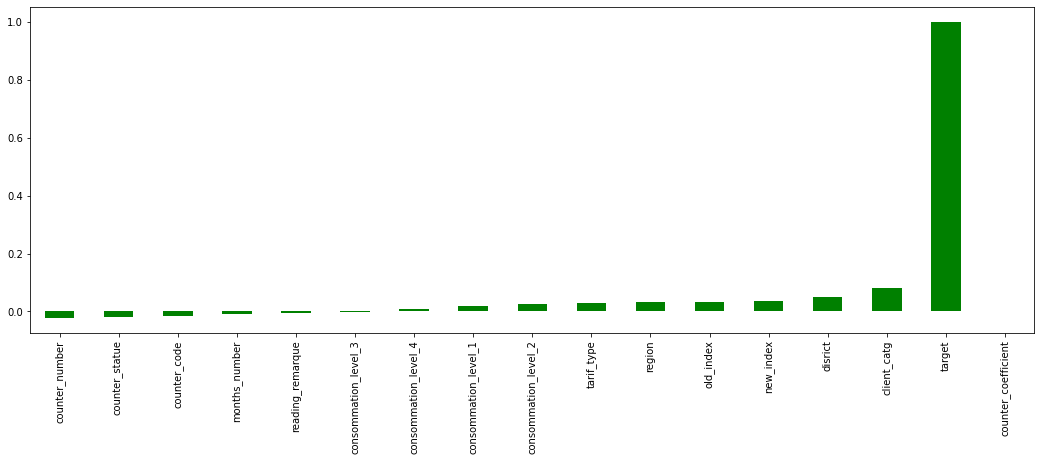

In [24]:
# Look at correlation with target
new_df.corr()['target'].sort_values().plot(kind='bar', color ='g', figsize=(18, 6))


.


## Take a look at the correlation between the variables

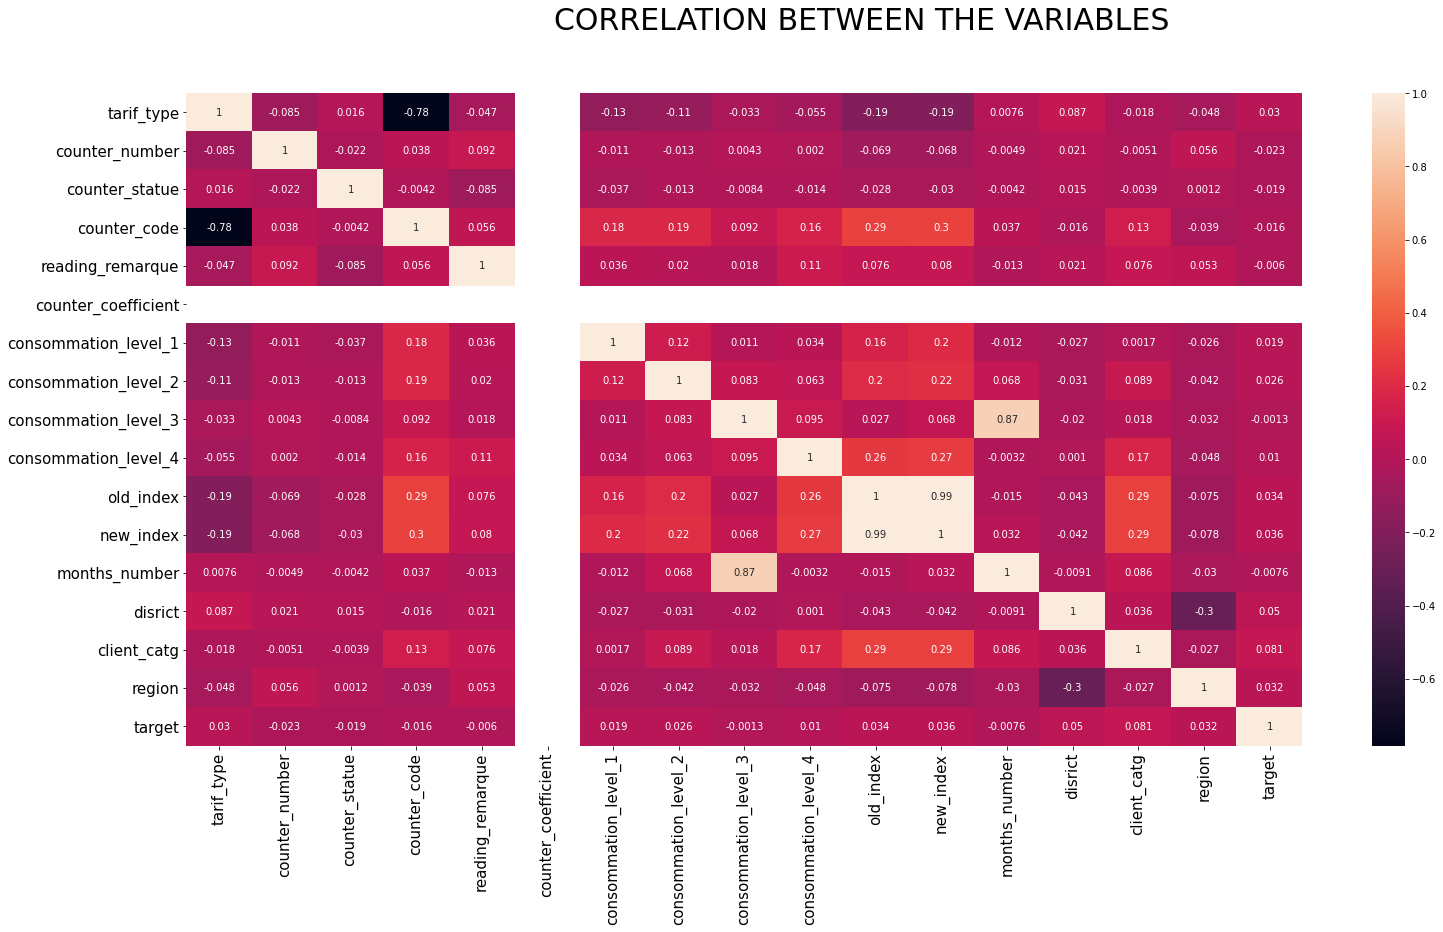

In [25]:
Correlation  = new_df.corr(method = 'pearson')

plt.figure(figsize=(25,12))
sns.heatmap(Correlation, annot=True)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.suptitle("CORRELATION BETWEEN THE VARIABLES", fontsize = 30)
plt.show()

From the correlation heatmap, we observe that the avariables (old index and new index) are strongly correlated.Putting features that are highly correlated to a model brings the problem of collinearity and could lower the performance of a model. You can decide to train one model with all the features, and then another with only the poorly correlated features and compare their accuracy.

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 0 to 94636
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             2835 non-null   object 
 1   invoice_date          2835 non-null   object 
 2   tarif_type            2835 non-null   float64
 3   counter_number        2835 non-null   float64
 4   counter_statue        2835 non-null   float64
 5   counter_code          2835 non-null   float64
 6   reading_remarque      2835 non-null   float64
 7   counter_coefficient   2835 non-null   float64
 8   consommation_level_1  2835 non-null   float64
 9   consommation_level_2  2835 non-null   float64
 10  consommation_level_3  2835 non-null   float64
 11  consommation_level_4  2835 non-null   float64
 12  old_index             2835 non-null   float64
 13  new_index             2835 non-null   float64
 14  months_number         2835 non-null   float64
 15  counter_type        

## Simple Feature engineering

#### Trend of of electricty fraud, based off of the month of joining 

<Figure size 1440x1080 with 0 Axes>

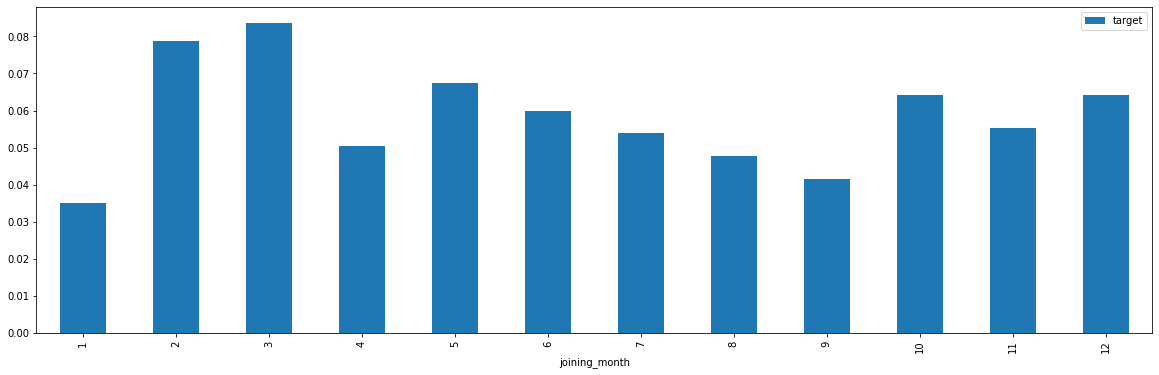

In [27]:

new_df['creation_date'] = pd.to_datetime(new_df['creation_date'])
new_df_test['creation_date'] = pd.to_datetime(new_df_test['creation_date'])

# Date variables
new_df_test['joining_month'] = new_df_test['creation_date'].dt.month
new_df_test['joining_year'] = new_df_test['creation_date'].dt.year

new_df['joining_month'] = new_df['creation_date'].dt.month
new_df['joining_year'] = new_df['creation_date'].dt.year


plt.figure(figsize = (20, 15))
new_df.groupby('joining_month').mean().reset_index().plot(y='target', x='joining_month', kind='bar', figsize = (20,6))

In [28]:
new_df

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target,joining_month,joining_year
0,train_Client_0,2014-03-24,11.0,1335667.0,0.0,203.0,8.0,1.0,82.0,0.0,0.0,0.0,14302.0,14384.0,4.0,ELEC,60,11,101,1994-12-31,0.0,12,1994
35,train_Client_1,2010-09-02,11.0,678902.0,0.0,203.0,8.0,1.0,388.0,0.0,0.0,0.0,11429.0,11817.0,2.0,ELEC,69,11,107,2002-05-29,0.0,5,2002
72,train_Client_10,2010-02-15,11.0,572765.0,0.0,203.0,8.0,1.0,407.0,0.0,0.0,0.0,31955.0,32362.0,4.0,ELEC,62,11,301,1986-03-13,0.0,3,1986
90,train_Client_100,2009-10-22,11.0,2078.0,0.0,413.0,6.0,1.0,0.0,0.0,0.0,0.0,98.0,98.0,4.0,ELEC,69,11,105,1996-11-07,0.0,11,1996
110,train_Client_1000,2015-02-13,11.0,19575.0,0.0,207.0,9.0,1.0,800.0,159.0,0.0,0.0,0.0,959.0,4.0,ELEC,62,11,303,2014-10-14,0.0,10,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94425,train_Client_102543,2012-11-06,11.0,161271.0,0.0,413.0,8.0,1.0,248.0,0.0,0.0,0.0,7377.0,7625.0,4.0,ELEC,60,11,101,2007-05-30,0.0,5,2007
94459,train_Client_102544,2017-09-06,11.0,599677.0,0.0,413.0,9.0,1.0,273.0,0.0,0.0,0.0,3682.0,3955.0,4.0,ELEC,60,11,101,1990-10-29,0.0,10,1990
94495,train_Client_102545,2007-04-09,40.0,103851.0,0.0,5.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,GAZ,62,11,305,1989-07-11,0.0,7,1989
94567,train_Client_102546,2017-11-22,11.0,139993.0,0.0,413.0,9.0,1.0,748.0,0.0,0.0,0.0,23508.0,24256.0,4.0,ELEC,69,11,104,2006-06-13,0.0,6,2006


## Trend of of electricty fraud, based off of the year of joining 

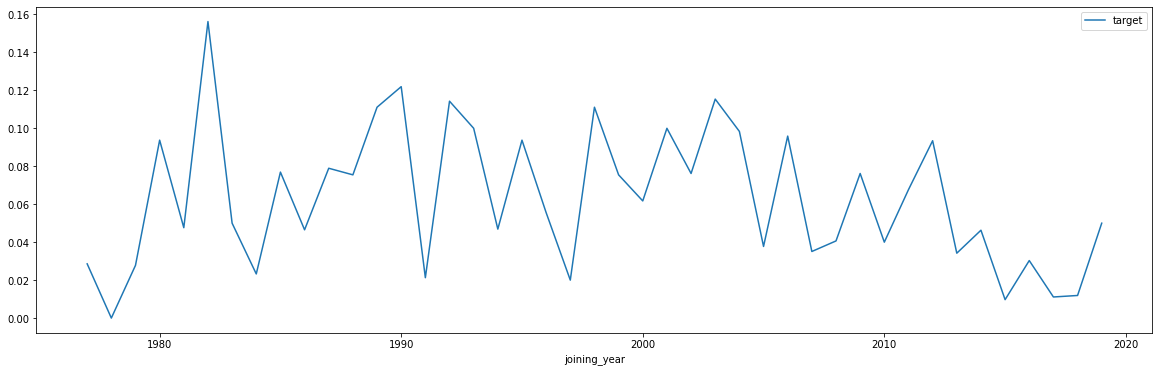

In [29]:
new_df.groupby('joining_year').mean().reset_index().plot(y='target', x='joining_year',figsize = (20,6))

## You can do more!!!

You can continue to look at different features and make visualizations that would allow yoiu to better understand the data

# Model Evaluation

We already have split datasets, so no need of splitting them more.

And since the target has a high correlation with each independent variable, we shall incorporate all.

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 0 to 94636
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   client_id             2835 non-null   object        
 1   invoice_date          2835 non-null   object        
 2   tarif_type            2835 non-null   float64       
 3   counter_number        2835 non-null   float64       
 4   counter_statue        2835 non-null   float64       
 5   counter_code          2835 non-null   float64       
 6   reading_remarque      2835 non-null   float64       
 7   counter_coefficient   2835 non-null   float64       
 8   consommation_level_1  2835 non-null   float64       
 9   consommation_level_2  2835 non-null   float64       
 10  consommation_level_3  2835 non-null   float64       
 11  consommation_level_4  2835 non-null   float64       
 12  old_index             2835 non-null   float64       
 13  new_index        

In [31]:

y_train = new_df['target']
X_train = new_df[['tarif_type', 'counter_number',
        'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number',  'disrict', 'client_catg',
       'region', 'joining_month', 'joining_year']]



X_test = new_df_test[['tarif_type', 'counter_number',
        'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number',  'disrict', 'client_catg',
       'region', 'joining_month', 'joining_year']]


Lets test model on our model

Define our Evaluation model

In [32]:
def evaluate_model(model,X,y):
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3, random_state =1)
    scores = cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise')
    return scores

In [33]:

# create array of models to evaluate
models = []
models.append(('LoR',LogisticRegression()))
models.append(('Dec_Tree',DecisionTreeClassifier(max_depth=5, random_state=0)))
models.append(('KNN',KNeighborsClassifier(n_neighbors = 10)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('GaussianNB',GaussianNB()))
# models.append(('SVM',SVC()))
# models.append(('R_Forest',RandomForestClassifier(n_estimators = 190, random_state=0)))


files = []
names = []
list_of_lists = []
predictions =[]
scores = []

for name,model in models:
    model.fit(X_train,y_train)
    
    pred_name = "y" + name
    
    pred_name = model.predict(X_test)
    
    print(name, " Accuracy: " ,np.mean(evaluate_model(model,X_train,y_train)))
    ss = pd.DataFrame()
    ss['client_id'] = new_df_test['client_id']
    ss['target'] = pred_name 
    ss.to_csv(name + ".csv",index=False)
        
    names.append(name)
    predictions.append(pred_name)

list_of_lists.append(predictions)
list_of_lists.append(names)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LoR  Accuracy:  0.940741800627084
Dec_Tree  Accuracy:  0.9365089832279897
KNN  Accuracy:  0.940741800627084
LDA  Accuracy:  0.9355662834486306
GaussianNB  Accuracy:  0.940741800627084


##  After submitting to Zindi, the scores:

Logistic Regression : 0.5

Decision Tree: 0.50580499496815

KNN: 0.50214540863999


Linear Discriminant Analysis: 0.500871236158714


Gaussian : 0.5

Random Forest : 0.503808680471835

SVM : 0.5

Bagging Decision Tree: 0.510623312135955

# Let's split our dataset into train and test our models with test and train splits

In [35]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.33,random_state=42)

In [36]:
scaler = StandardScaler()
scaler.fit(X_train_split)
scaler.transform(X_train_split)
# Repeat same thing now evaluating our models
models = []
models.append(('LoR_split',LogisticRegression(random_state=0,max_iter = 1000)))
models.append(('Dec_Tree_split',DecisionTreeClassifier(max_depth=5, random_state=0)))
models.append(('KNN_split',KNeighborsClassifier(n_neighbors = 10)))
models.append(('LDA_split',LinearDiscriminantAnalysis()))
models.append(('GaussianNB_split',GaussianNB()))
# models.append(('SVM_split',SVC()))
# 
files = []
names = []
list_of_lists = []
predictions =[]
scores = []

for name,model in models:
    model.fit(X_train_split,y_train_split)
    
    pred_name = "y" + name
    
    pred_name = model.predict(X_test_split)
    
    # evaluate model
    print(name," MAE :", mean_absolute_error(y_test_split,pred_name))
    print(name," Model Accuracy : ", np.mean(evaluate_model(model,X_test_split,y_test_split)))

    
        
    names.append(name)
    predictions.append(pred_name)

list_of_lists.append(predictions)
list_of_lists.append(names)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LoR_split  MAE : 0.057692307692307696
LoR_split  Model Accuracy :  0.9423244108899564
Dec_Tree_split  MAE : 0.05876068376068376
Dec_Tree_split  Model Accuracy :  0.9284336154960726
KNN_split  MAE : 0.057692307692307696
KNN_split  Model Accuracy :  0.9423244108899564
LDA_split  MAE : 0.05876068376068376
LDA_split  Model Accuracy :  0.9355601311675437
GaussianNB_split  MAE : 0.057692307692307696
GaussianNB_split  Model Accuracy :  0.9423244108899564


## Let's use to boosting ensemble our models with Catboost

In [37]:
model = CatBoostClassifier(iterations = 1000,learning_rate = 1, depth = 2,metric_period=100)
model = model.fit(X_train,y_train)
pred_y = model.predict(X_test)

# create submission_csv
ss_boost = pd.DataFrame()
ss_boost['client_id'] = new_df_test['client_id']
ss_boost['target'] = pred_y
ss_boost.to_csv("Catboost" + ".csv",index=False)

print("Catboost"," Model Accuracy : ", np.mean(evaluate_model(model,X_test_split,y_test_split)))


0:	learn: 0.2237226	total: 49.6ms	remaining: 49.6s
100:	learn: 0.1237373	total: 183ms	remaining: 1.63s
200:	learn: 0.0749233	total: 318ms	remaining: 1.26s
300:	learn: 0.0493269	total: 452ms	remaining: 1.05s
400:	learn: 0.0317684	total: 587ms	remaining: 876ms
500:	learn: 0.0219376	total: 726ms	remaining: 723ms
600:	learn: 0.0155817	total: 867ms	remaining: 576ms
700:	learn: 0.0114647	total: 1s	remaining: 429ms
800:	learn: 0.0090245	total: 1.14s	remaining: 284ms
900:	learn: 0.0074499	total: 1.27s	remaining: 140ms
999:	learn: 0.0069395	total: 1.4s	remaining: 0us
Catboost  Model Accuracy :  0.9181308625028597


##  Let's try a stacking ensemble model with a few models

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
# scaler.transform(X_train)

def stack_models():
    # base models
    models = []
    # models.append(('LoR_split',LogisticRegression(random_state=0,max_iter=1000)))
    models.append(('Dec_Tree_split',DecisionTreeClassifier(max_depth=5, random_state=0)))
    models.append(('KNN_split',KNeighborsClassifier(n_neighbors = 10)))
    models.append(('LDA_split',LinearDiscriminantAnalysis()))
    models.append(('GaussianNB_split',GaussianNB()))
    models.append(('SVM_split',SVC()))
    # estimator model
    fin_estimator = LogisticRegression()
    # stacking ensemble
    model = StackingClassifier(estimators = models, final_estimator = fin_estimator, cv =5)
    return model

# Evaluate our stacked model
model_stack = stack_models()
pred_y = model_stack.fit(X_train,y_train)
print("Stacked model Accuracy : ", np.mean(evaluate_model(model_stack,X_train,y_train)))

ss_boost = pd.DataFrame()
ss_boost['client_id'] = new_df_test['client_id']
ss_boost['target'] = pred_y 
ss_boost.to_csv("Stacked" + ".csv",index=False)

Stacked model Accuracy :  0.9401528724763184


##  Let's try an bagging ensemble model with a few models

In [39]:
models = []
models.append(('Bg_C_ExtraTree', BaggingClassifier(base_estimator = ExtraTreeClassifier(random_state = 0),random_state=0)))
models.append(('Bg_C_SVM', BaggingClassifier(base_estimator = SVC(), n_estimators = 10,random_state=0)))
models.append(('Bg_C_DTree', BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=5, random_state=0), n_estimators = 10,random_state=0)))
models.append(('R_Forest_split',RandomForestClassifier(n_estimators = 190, random_state=0)))

for name,model in models:
    model.fit(X_train,y_train)
    
    pred_name = "y" + name
    
    pred_name = model.predict(X_test)
    
    print(name, " Accuracy: " ,np.mean(evaluate_model(model,X_train,y_train)))
    
    # create csv
    ss_bagging = pd.DataFrame()
    ss_bagging['client_id'] = new_df_test['client_id']
    ss_bagging['target'] = pred_name 
    ss_bagging.to_csv(name + ".csv",index=False)

Bg_C_ExtraTree  Accuracy:  0.9382728645133461
Bg_C_SVM  Accuracy:  0.940741800627084
Bg_C_DTree  Accuracy:  0.9401532872144528
R_Forest_split  Accuracy:  0.9400363310605684


## You can do more to improve the model!
#### More Boosting Algorithms e.g XgBoost, AdaBoost
#### More Ensembles i.e Bagging, Voting, Gradient Boosting